### Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df_customers=pd.read_csv('customers.csv')
df_loans=pd.read_csv('loans.csv')
df_bureau=pd.read_csv('bureau_data.csv')

In [3]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customers.head(2)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001


In [5]:
df=pd.merge(df_customers,df_loans,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.0,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.0,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.0,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.0,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.0,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df=pd.merge(df,df_bureau)
df.head(3)

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [8]:
df.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'default',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count',
       'credit_utilization_ratio'],
      dtype='object')

In [9]:
df['default']=df['default'].astype(int)
df.default.value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

### To prevent data leakage splitting the data first

In [10]:
X=df.drop('default',axis='columns')
y=df['default']


X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=42)


In [11]:
df_train=pd.concat([X_train,y_train],axis='columns')
df_test=pd.concat([X_test,y_test],axis='columns')
df_train.shape, df_test.shape

((37500, 33), (12500, 33))

<h2>Data Cleaning</h2>

In [12]:
df_train.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 47
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [13]:
df_train.residence_type.value_counts()

residence_type
Owned       21133
Mortgage     8858
Rented       7462
Name: count, dtype: int64

In [14]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [15]:
mode_residence=df_train.residence_type.mode()[0]
mode_residence

'Owned'

In [16]:
df_train.residence_type.fillna(mode_residence,inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_14232\1744904132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.residence_type.fillna(mode_residence,inplace=True)


In [17]:
df_train.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented'], dtype=object)

In [18]:
df_train.isna().sum()   

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
number_of_open_accounts        0
number_of_closed_accounts      0
total_loan_months              0
delinquent_months              0
total_dpd                      0
enquiry_co

In [19]:
df_test.isna().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 15
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [20]:
df_test.residence_type.fillna(mode_residence,inplace=True)  #filling the missing values for the test data also

C:\Users\msi\AppData\Local\Temp\ipykernel_14232\1774380839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.residence_type.fillna(mode_residence,inplace=True)  #filling the missing values for the test data also


In [21]:
df_train.duplicated().sum()

0

In [22]:
df_test.duplicated().sum()

0

In [23]:
df_train.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [24]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']

<Axes: ylabel='age'>

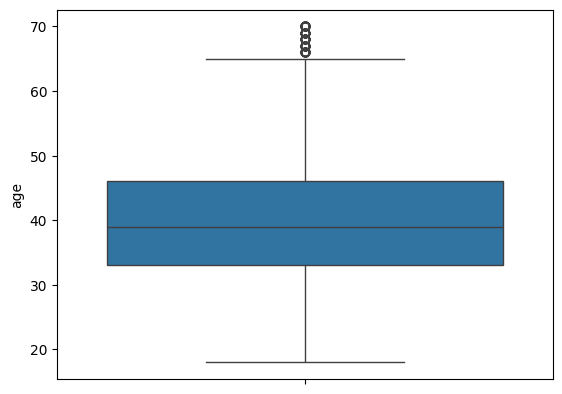

In [25]:
sns.boxplot(df_train.age)

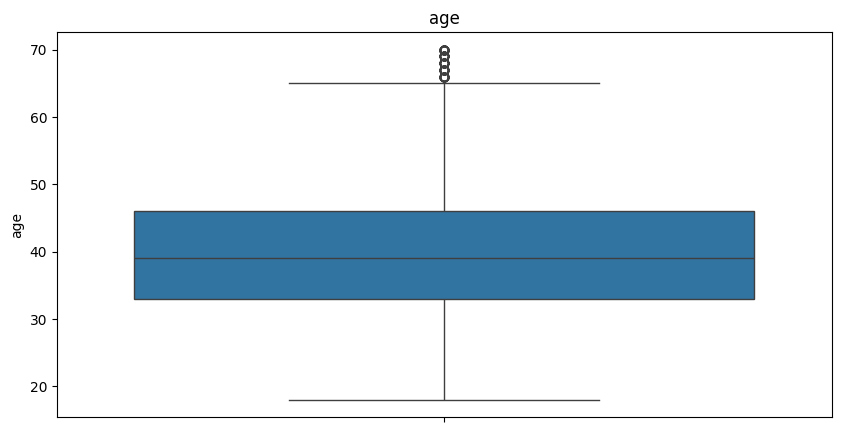

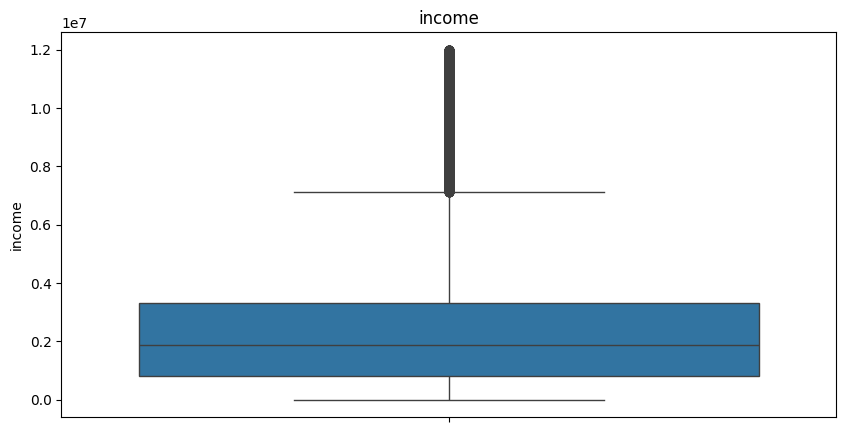

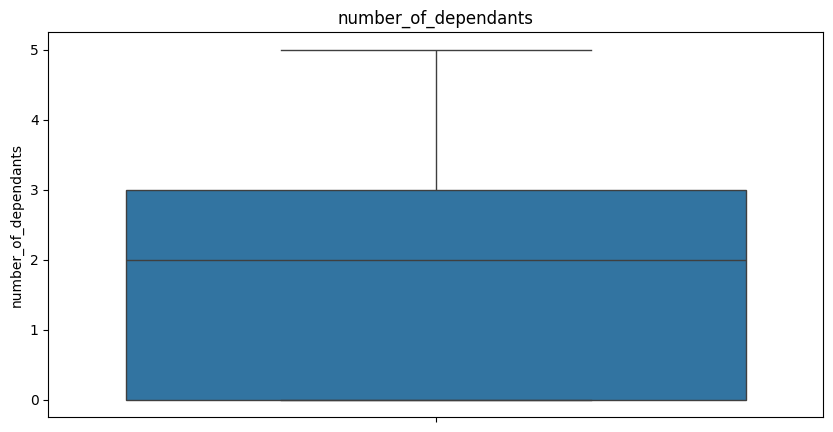

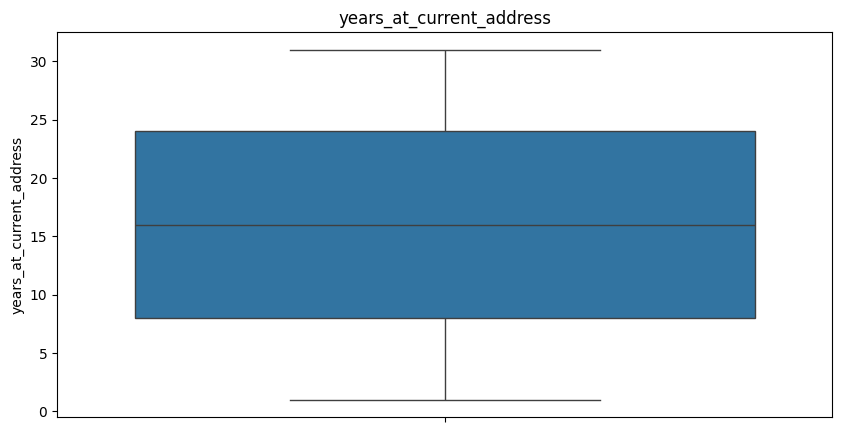

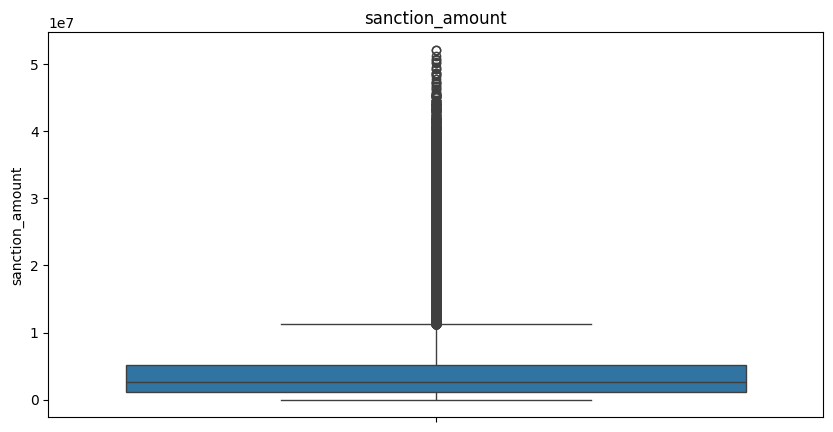

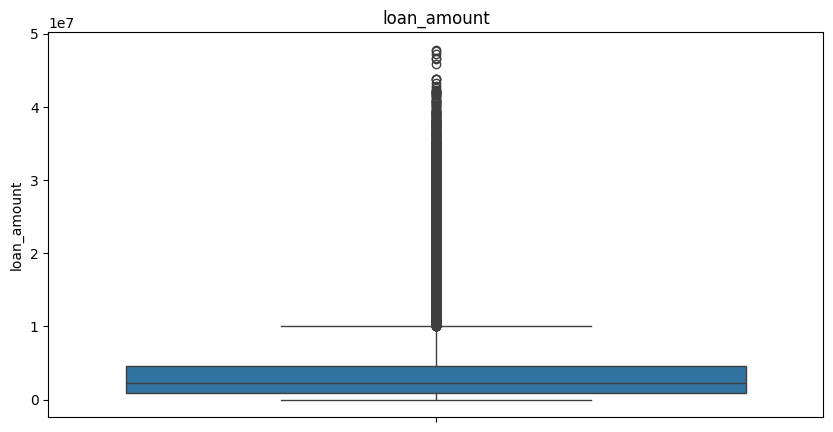

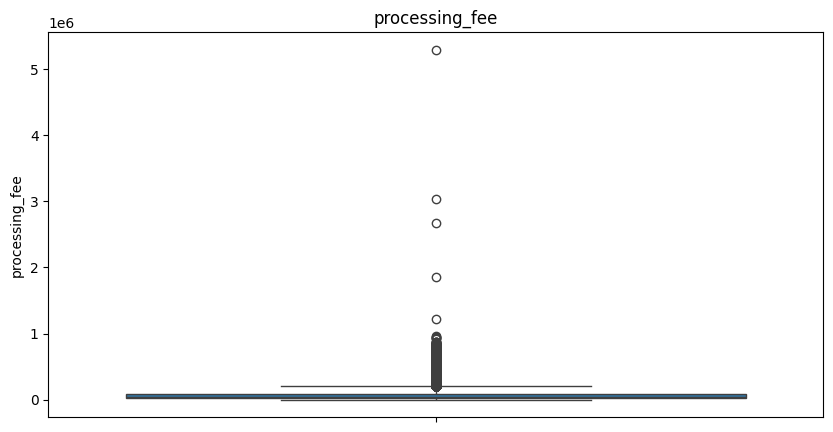

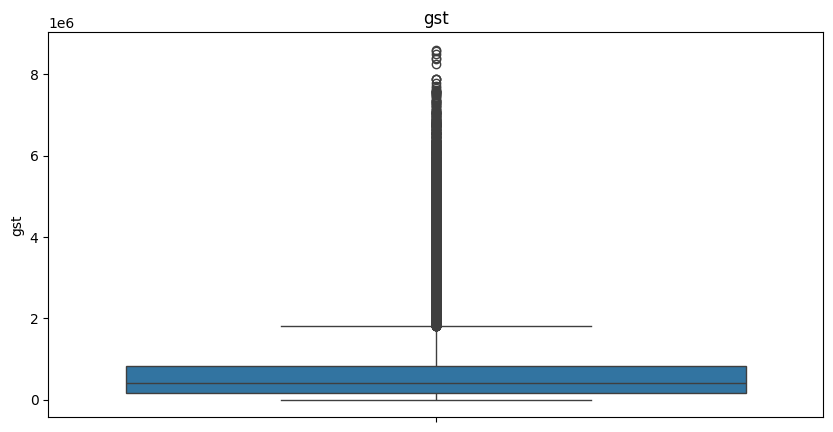

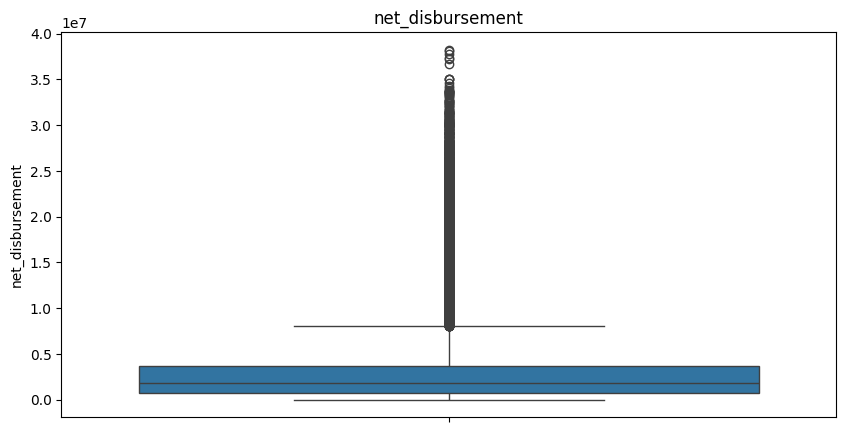

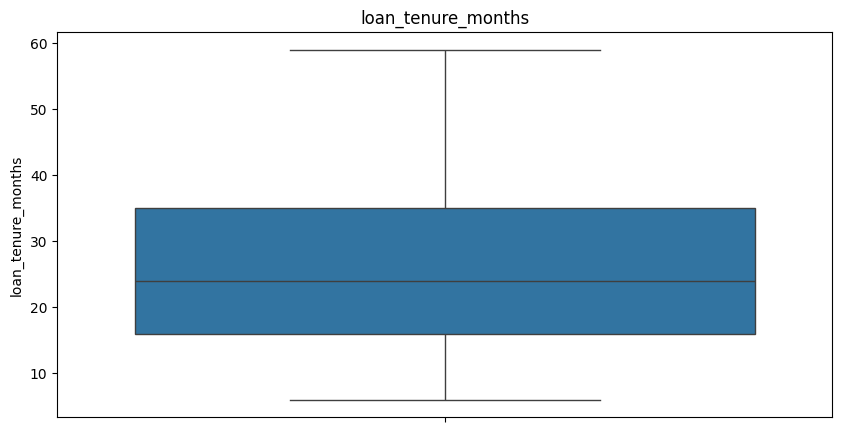

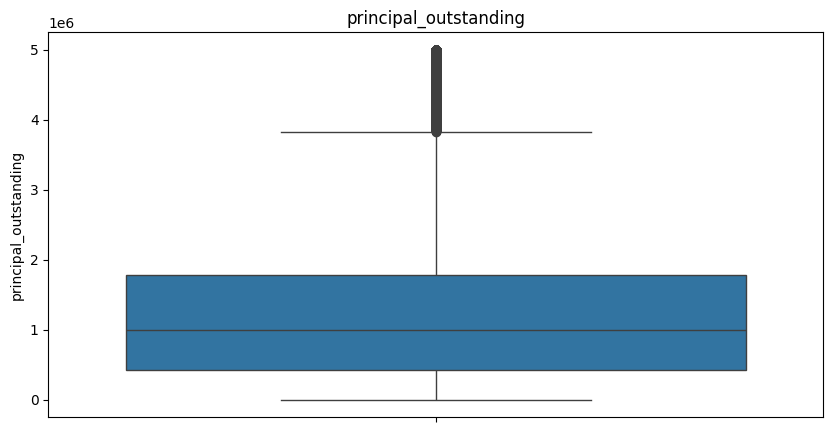

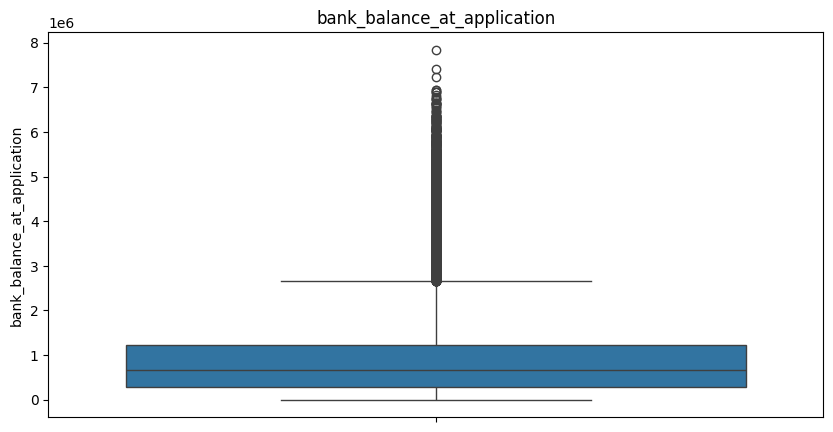

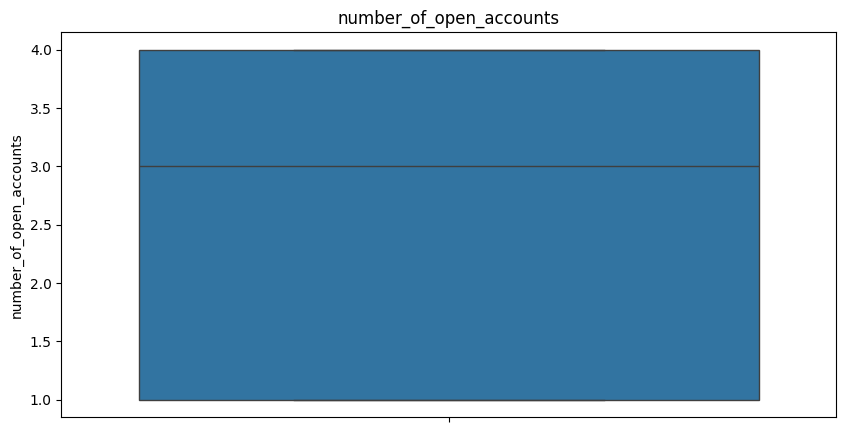

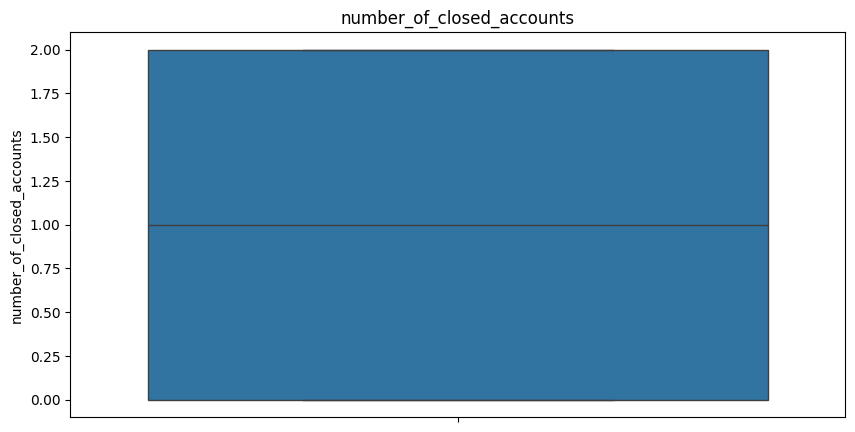

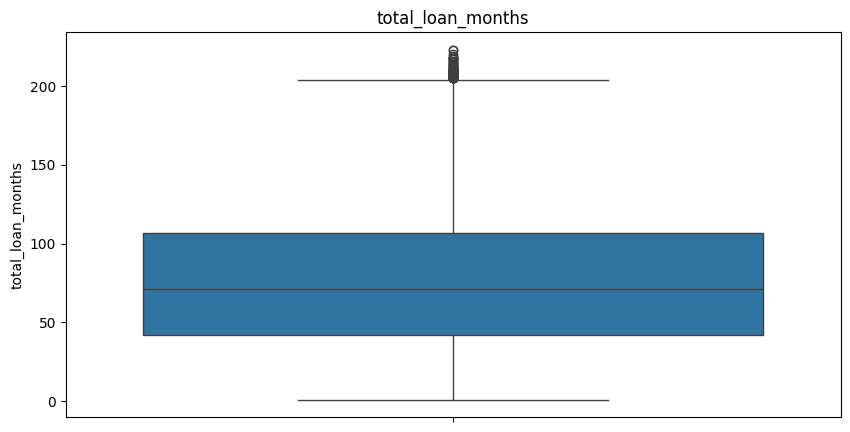

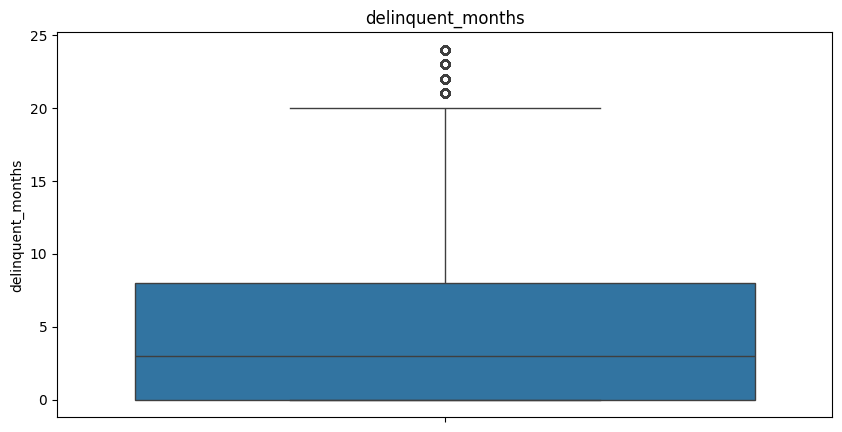

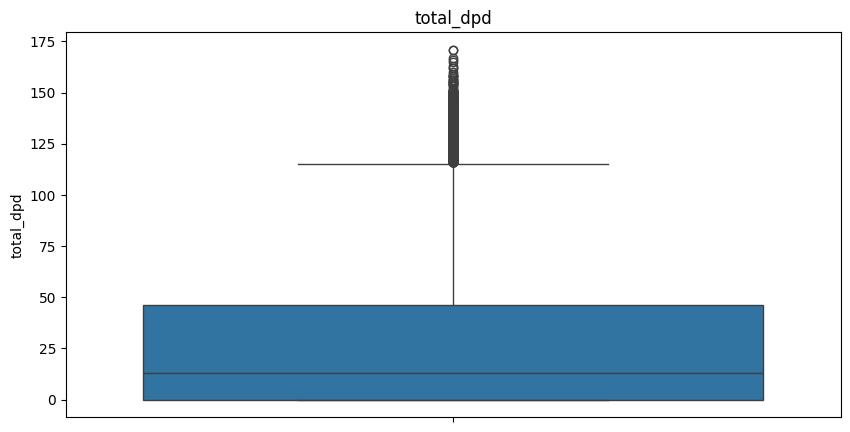

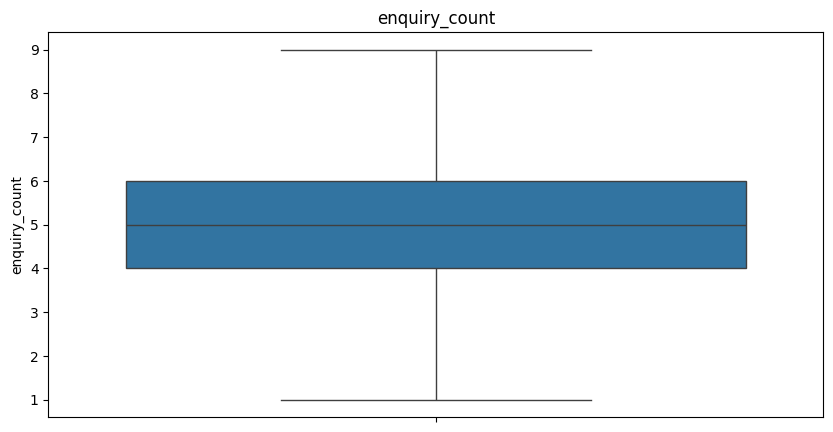

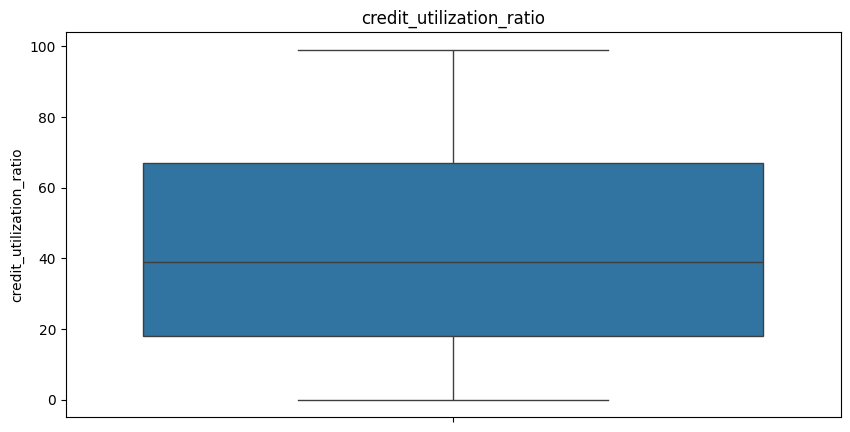

In [26]:
for col in columns_continuous:
    plt.figure(figsize=(10,5))
    sns.boxplot(df_train[col])
    plt.title(col)
    plt.show()

Boxplot to visualize Outliers

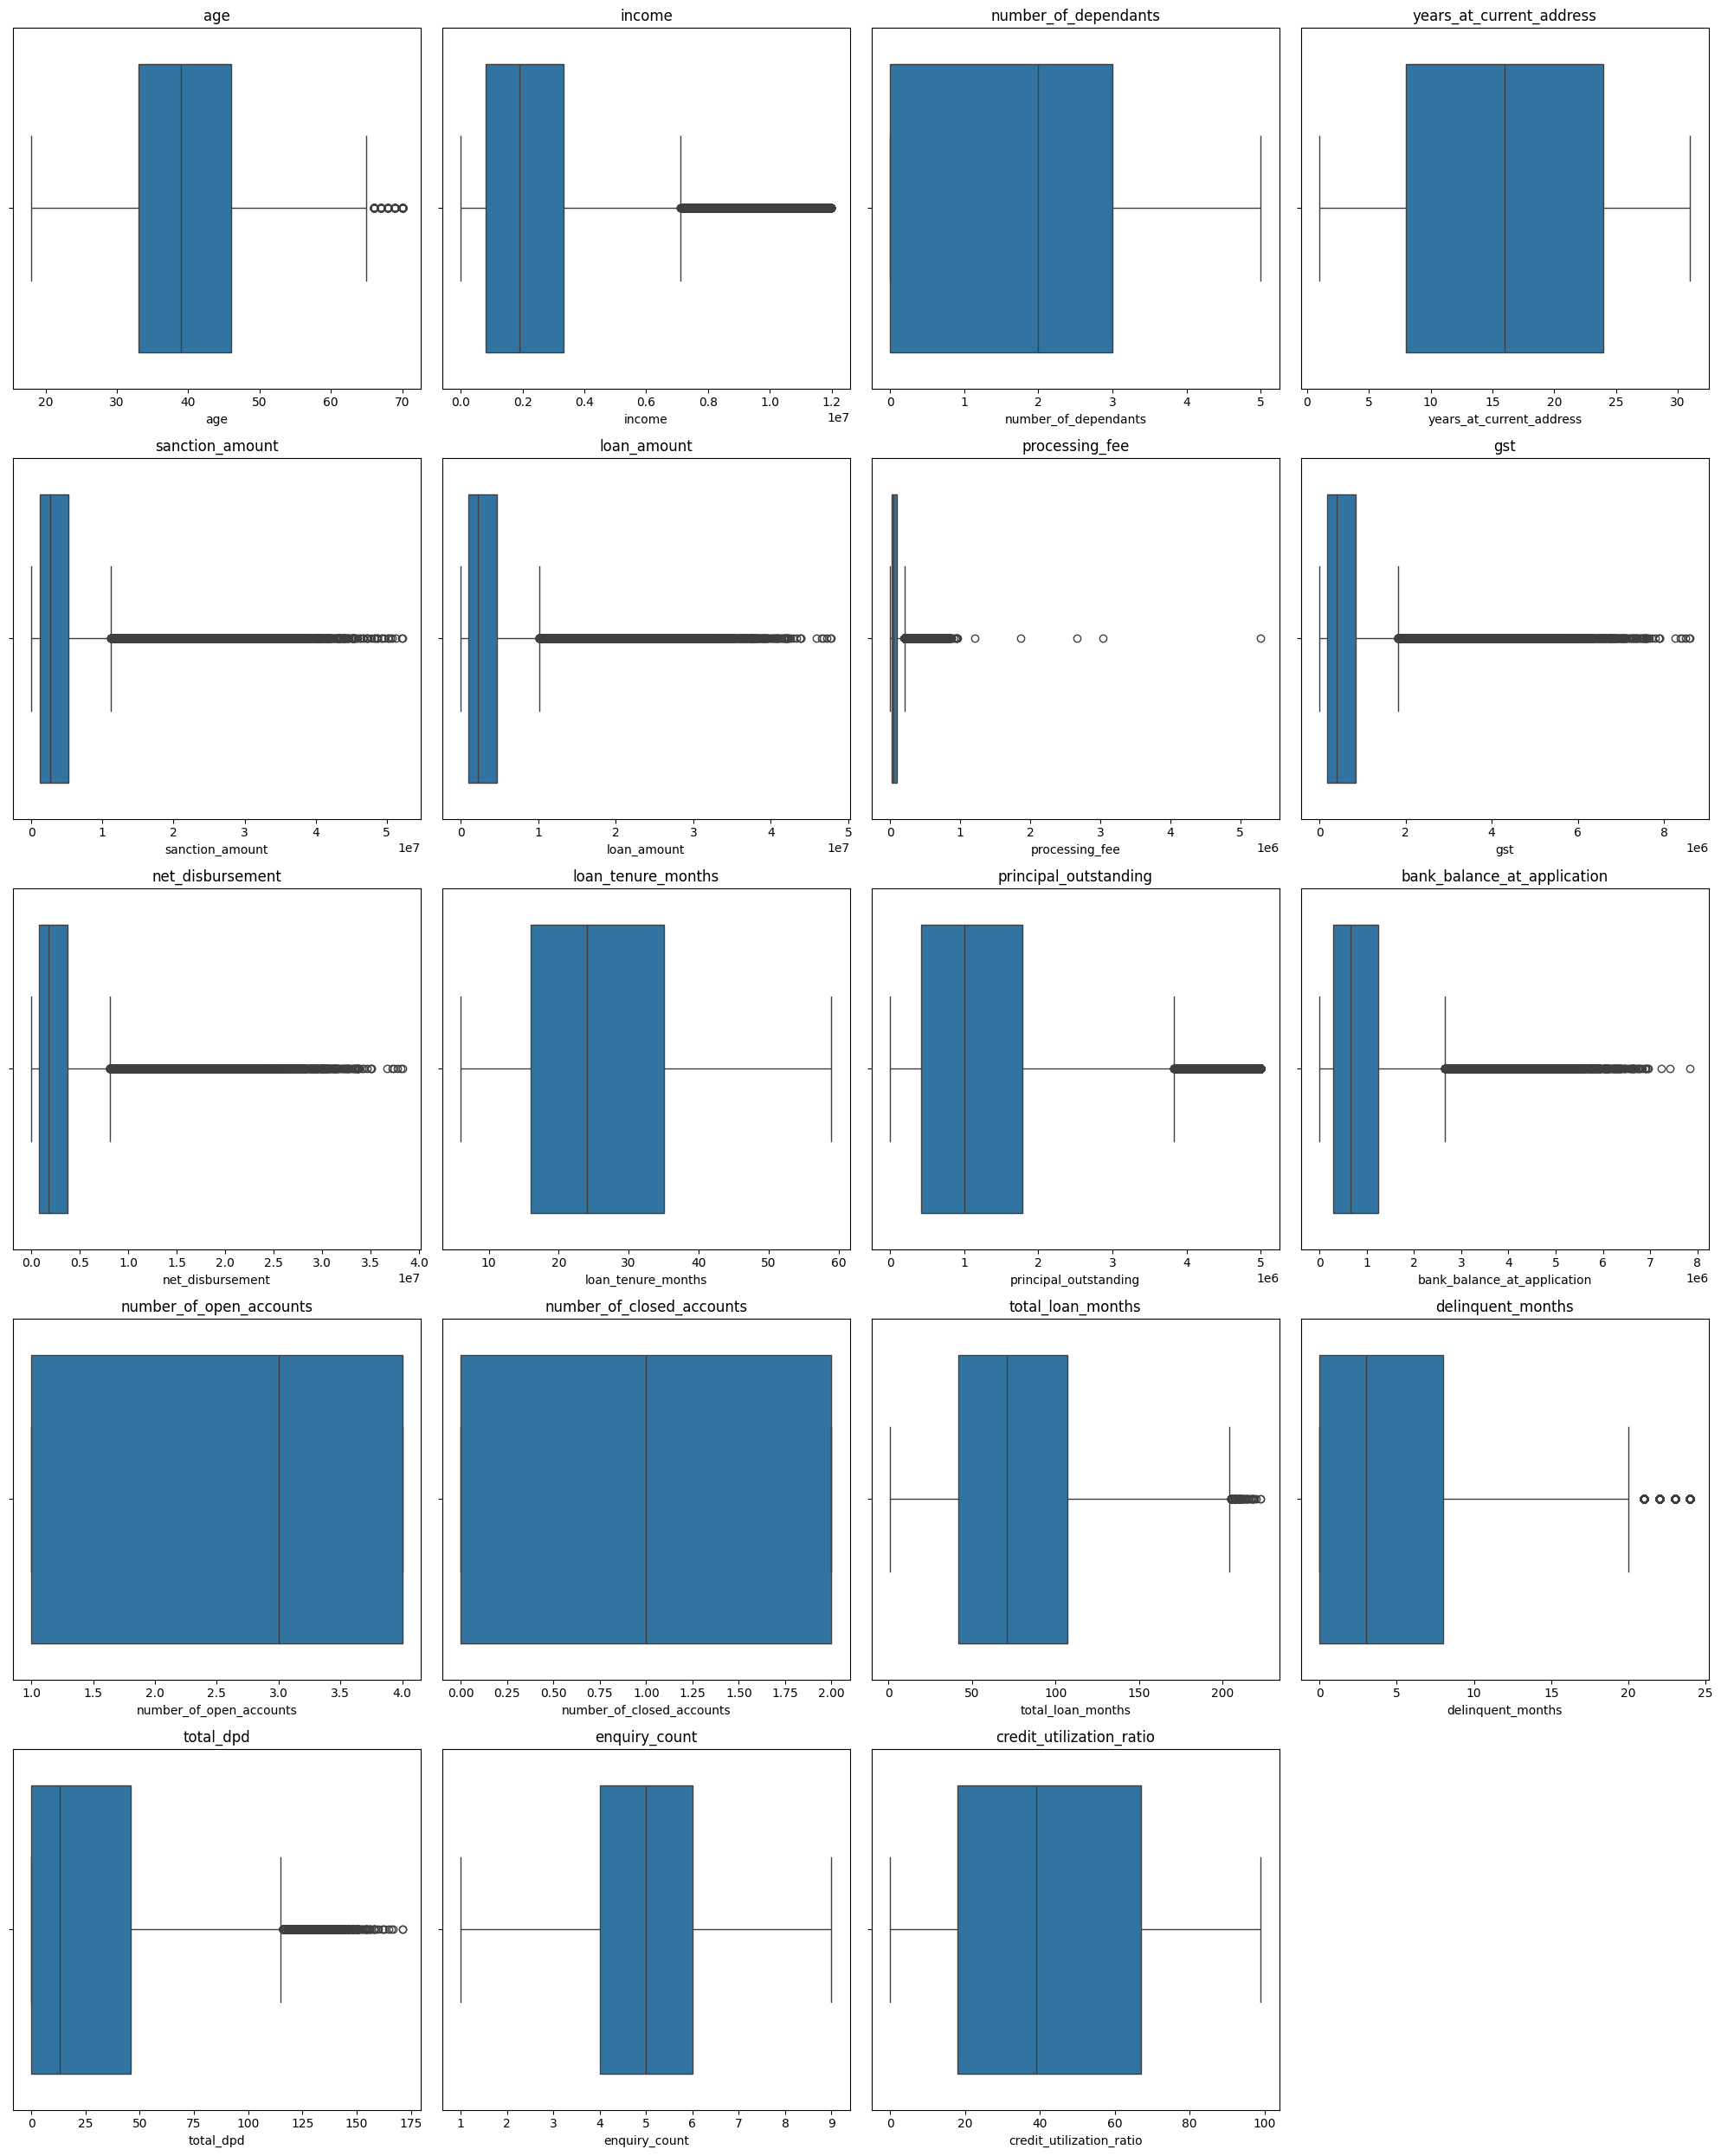

In [27]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.boxplot(x=df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

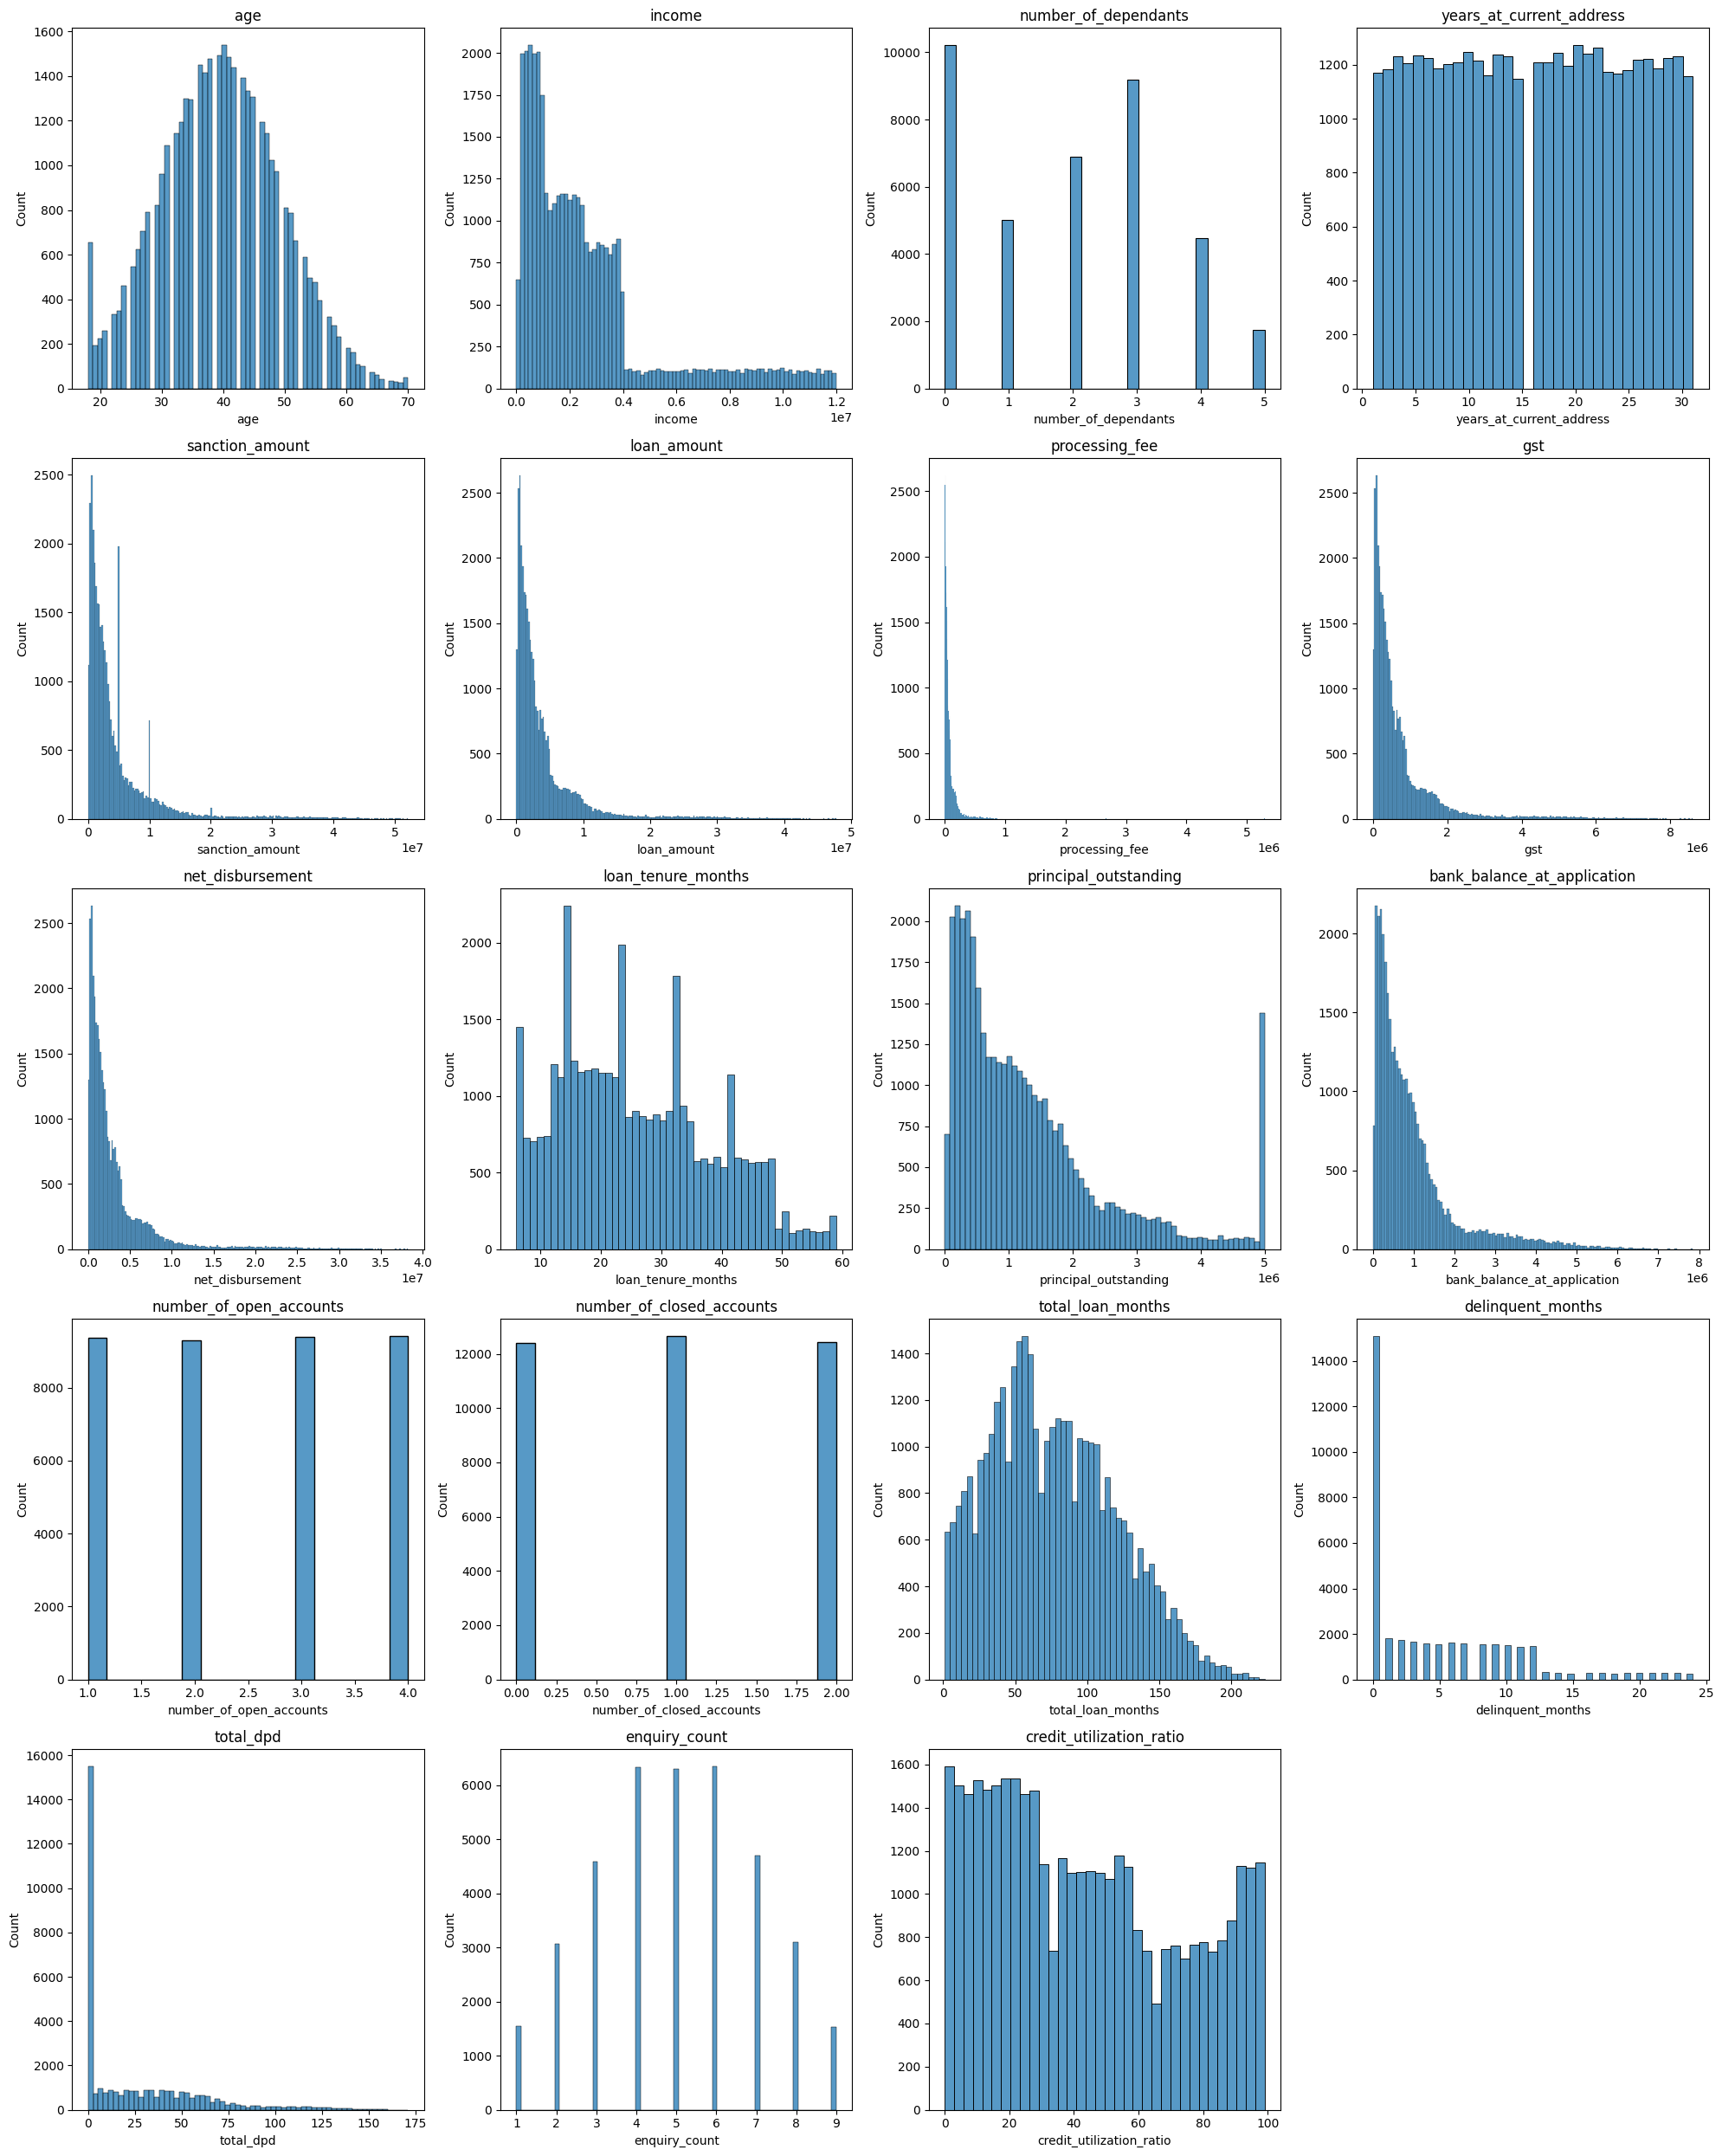

In [28]:
num_plots = len(columns_continuous)
num_cols = 4  # Number of plots per row
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easier indexing

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title to the name of the variable

# If there are any empty plots (if the number of plots isn't a perfect multiple of num_cols), hide the axes
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [29]:
df_train.processing_fee.describe()

count    3.750000e+04
mean     8.029068e+04
std      1.131281e+05
min      0.000000e+00
25%      1.922000e+04
50%      4.460000e+04
75%      9.242000e+04
max      5.293544e+06
Name: processing_fee, dtype: float64

In [30]:
df_train[df_train.processing_fee==df_train.processing_fee.max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
9898,3626000,5.293544e+06


In [31]:
df_train[df_train.processing_fee>df_train.loan_amount][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


These are clearly outliers

In [32]:
df_train[(df_train.processing_fee/df_train.loan_amount)>0.3][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,2.669791e+06
28174,966000,1.214493e+06
47089,1738000,1.858965e+06
29305,2616000,3.036378e+06
9898,3626000,5.293544e+06


In [33]:
df_train_1=df_train[(df_train.processing_fee/df_train.loan_amount)<0.3].copy()
df_train_1[(df_train_1.processing_fee/df_train_1.loan_amount)>0.3][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [34]:
df_test=df_test[(df_test.processing_fee/df_test.loan_amount)<0.3].copy()
df_test.shape


(12497, 33)

In [35]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [36]:
for col in columns_categorical:
    print(col, "-->",df_train_1[col].unique())

gender --> ['M' 'F']
marital_status --> ['Married' 'Single']
employment_status --> ['Self-Employed' 'Salaried']
residence_type --> ['Owned' 'Mortgage' 'Rented']
city --> ['Hyderabad' 'Mumbai' 'Chennai' 'Bangalore' 'Pune' 'Kolkata' 'Ahmedabad'
 'Delhi' 'Lucknow' 'Jaipur']
state --> ['Telangana' 'Maharashtra' 'Tamil Nadu' 'Karnataka' 'West Bengal'
 'Gujarat' 'Delhi' 'Uttar Pradesh' 'Rajasthan']
zipcode --> [500001 400001 600001 560001 411001 700001 380001 110001 226001 302001]
loan_purpose --> ['Home' 'Education' 'Personal' 'Auto' 'Personaal']
loan_type --> ['Secured' 'Unsecured']
default --> [0 1]


In [37]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')

In [38]:
df_train_1.loan_purpose.unique()

array(['Home', 'Education', 'Personal', 'Auto'], dtype=object)

<h3 align='center' style='color:blue'>Explotary Data Analysis</h3>

In [39]:
columns_continuous

['age',
 'income',
 'number_of_dependants',
 'years_at_current_address',
 'sanction_amount',
 'loan_amount',
 'processing_fee',
 'gst',
 'net_disbursement',
 'loan_tenure_months',
 'principal_outstanding',
 'bank_balance_at_application',
 'number_of_open_accounts',
 'number_of_closed_accounts',
 'total_loan_months',
 'delinquent_months',
 'total_dpd',
 'enquiry_count',
 'credit_utilization_ratio']

<Axes: xlabel='age', ylabel='Density'>

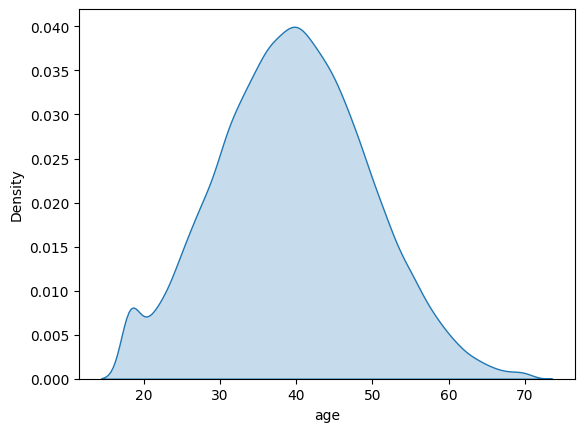

In [40]:
sns.kdeplot(df_train.age,fill=True)

<Axes: xlabel='age', ylabel='Count'>

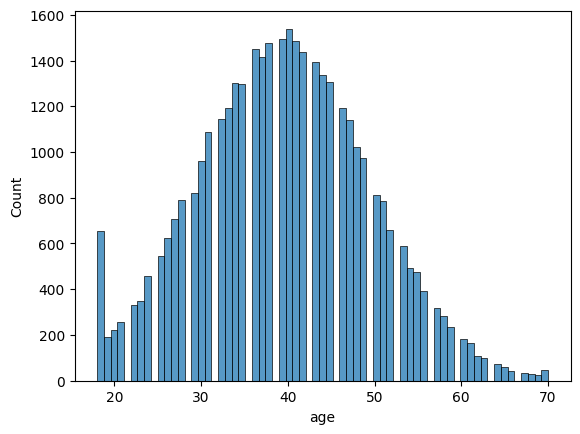

In [41]:
sns.histplot(df_train.age)

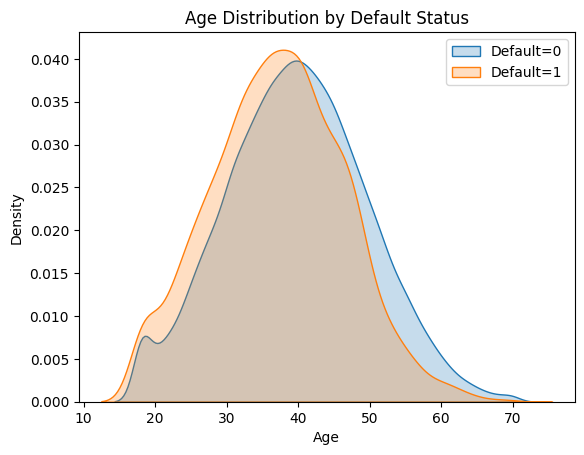

In [42]:
sns.kdeplot(df_train[df_train['default']==0]['age'],fill=True,label='Default=0')
sns.kdeplot(df_train[df_train['default']==1]['age'],fill=True,label='Default=1')
plt.title('Age Distribution by Default Status')
plt.xlabel('Age')   
plt.ylabel('Density')
plt.legend()

**Insights**

1. Orange graph is littlebit shifted to the left of blue graph which indicates that people with younger age are more likely to default

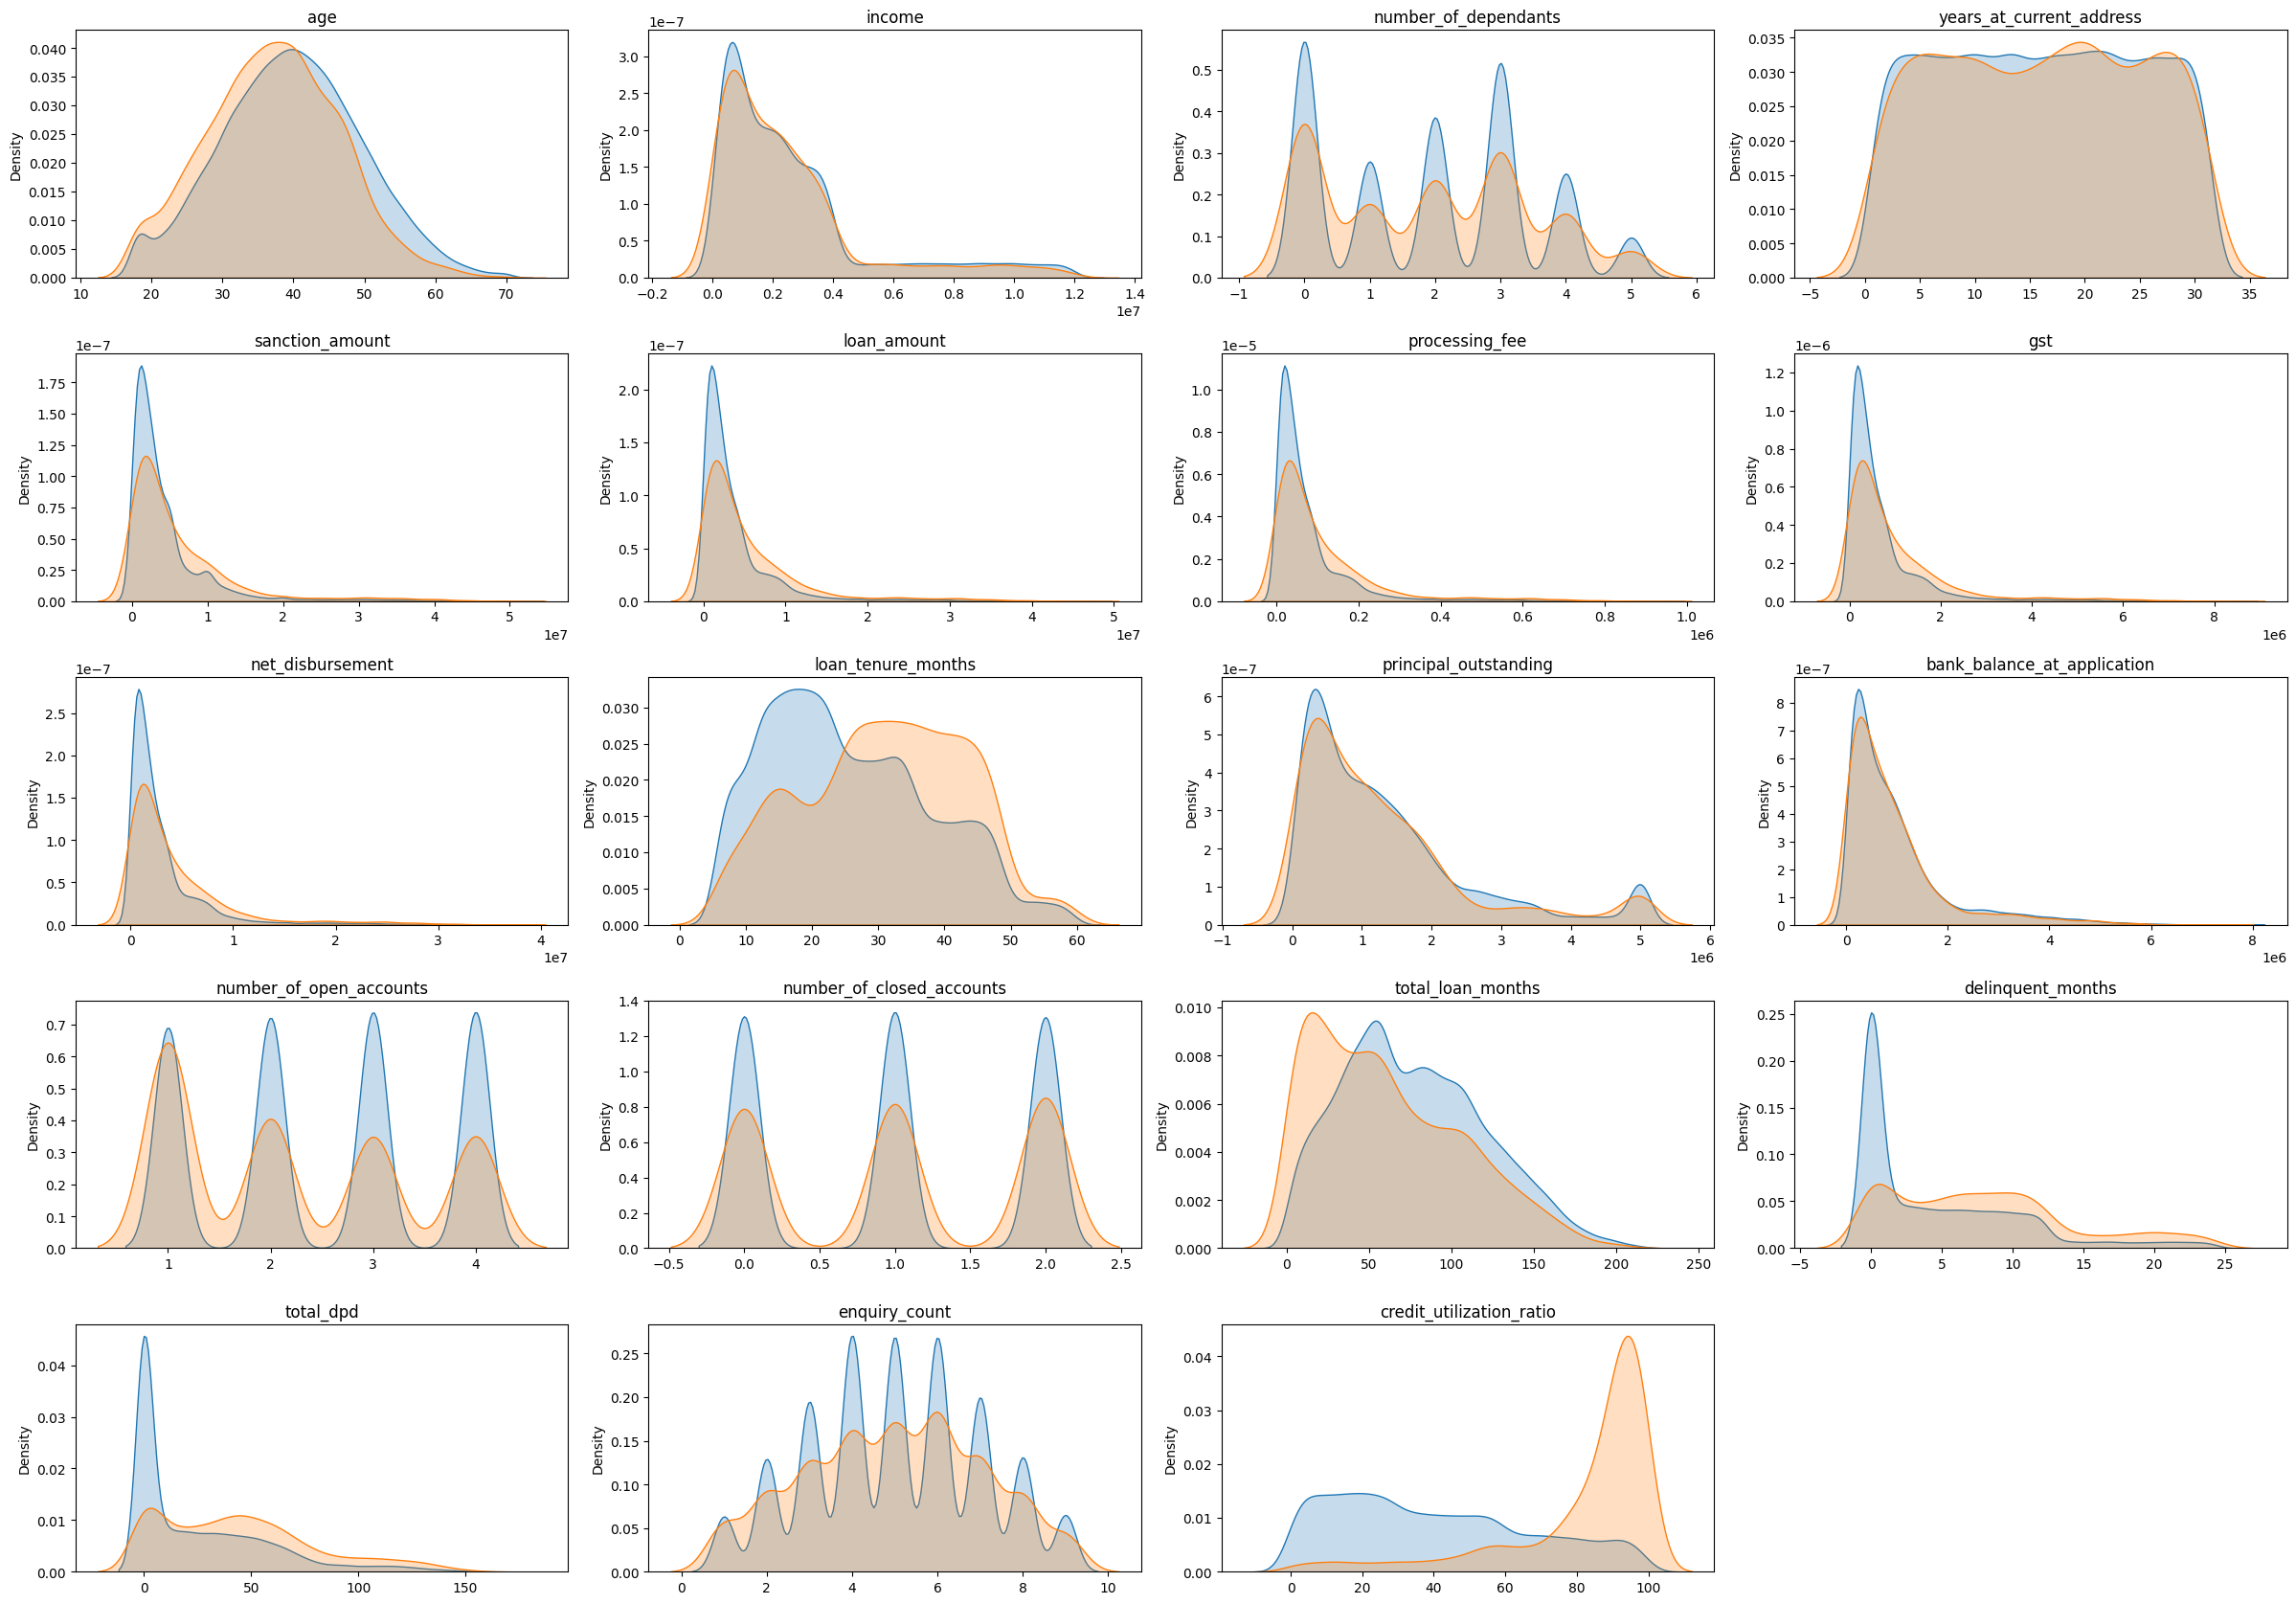

In [43]:
plt.figure(figsize=(24, 20))  # Width, height in inches

for i, col in enumerate(columns_continuous):
    plt.subplot(6, 4, i+1)  # 1 row, 4 columns, ith subplot
    sns.kdeplot(df_train_1[col][df_train_1['default']==0], fill=True, label='default=0')
    sns.kdeplot(df_train_1[col][df_train_1['default']==1], fill=True, label='default=1')
    plt.title(col)        
    plt.xlabel('')
    
plt.tight_layout()
plt.show()

**Insights**

1. In columns: loan_tenure_months, delinquent_months, total_dpd, credit_utilization, higher values indicate high likelyhood of becoming a default. Hence these 4 looks like strong predictors
1. In remaining columns the distributions do not give any obvious insights
1. Why loan_amount and income did not give any signs of being strong predictors? May be when we combine these two and get loan to income ratio (LTI), that may have influence on the target variable. We will explore more later

<h3>Feature Engineering</h3>

In [44]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'],
      dtype='object')

In [45]:
df_train_1[['loan_amount','income']]

,loan_amount,income
12746,23442000,11327000
32495,1149000,715000
43675,11296000,3195000
9040,1695000,1500000
13077,905000,1817000
...,...,...
28515,1420000,2470000
5558,2753000,2472000
45236,4479000,1329000
49228,1890000,1274000


In [46]:
df_train_1['loan_to_income']=round(df_train_1['loan_amount']/df_train_1['income'],2)
df_test['loan_to_income'] = round(df_test['loan_amount'] / df_test['income'],2)

In [47]:
df_train_1.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default,loan_to_income
12746,C12747,59,M,Married,Self-Employed,11327000,3,Owned,30,Hyderabad,...,2020-11-11,4,2,152,20,118,4,36,0,2.07
32495,C32496,44,F,Single,Salaried,715000,0,Owned,27,Mumbai,...,2022-10-27,3,1,160,10,62,5,5,0,1.61
43675,C43676,38,M,Single,Salaried,3195000,0,Mortgage,26,Chennai,...,2023-12-29,1,1,54,12,67,4,0,0,3.54
9040,C09041,42,M,Married,Salaried,1500000,2,Mortgage,30,Bangalore,...,2020-07-07,3,0,76,0,0,8,87,0,1.13
13077,C13078,58,M,Married,Self-Employed,1817000,4,Owned,29,Pune,...,2020-12-07,1,2,60,0,0,1,71,0,0.50


In [48]:
df_train_1['loan_to_income'].describe()

count    37488.000000
mean         1.556711
std          0.973687
min          0.300000
25%          0.770000
50%          1.160000
75%          2.460000
max          4.570000
Name: loan_to_income, dtype: float64

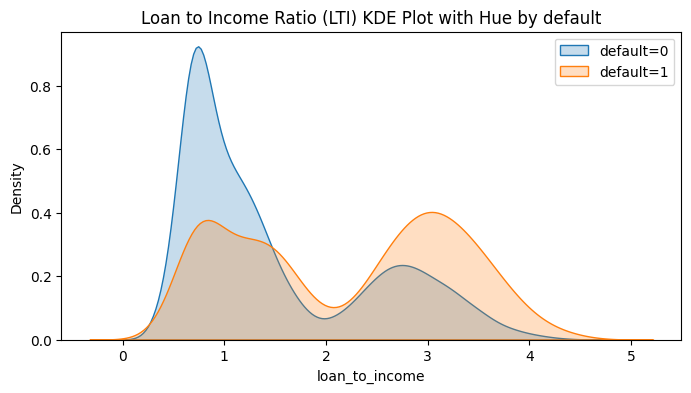

In [49]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['loan_to_income'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Loan to Income Ratio (LTI) KDE Plot with Hue by default")
plt.legend()
plt.show()

In [50]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income'],
      dtype='object')

In [51]:
df_train_1[['delinquent_months','total_loan_months']]

,delinquent_months,total_loan_months
12746,20,152
32495,10,160
43675,12,54
9040,0,76
13077,0,60
...,...,...
28515,0,40
5558,14,52
45236,11,130
49228,0,88


In [52]:
df_train_1['delinquency_ratio']=(df_train_1['delinquent_months']*100/df_train_1['total_loan_months']).round(2)
df_test['delinquency_ratio'] = (df_test['delinquent_months']*100 / df_test['total_loan_months']).round(2)

In [53]:
df_train_1['delinquency_ratio'].describe()

count    37488.000000
mean        10.329963
std         17.298339
min          0.000000
25%          0.000000
50%          3.680000
75%         12.950000
max        100.000000
Name: delinquency_ratio, dtype: float64

In [54]:
df_train_1[['delinquent_months','total_loan_months','delinquency_ratio']].head(10)

,delinquent_months,total_loan_months,delinquency_ratio
12746,20,152,13.16
32495,10,160,6.25
43675,12,54,22.22
9040,0,76,0.00
13077,0,60,0.00
19294,2,103,1.94
43968,0,4,0.00
17959,9,14,64.29
17203,0,59,0.00
19027,0,83,0.00


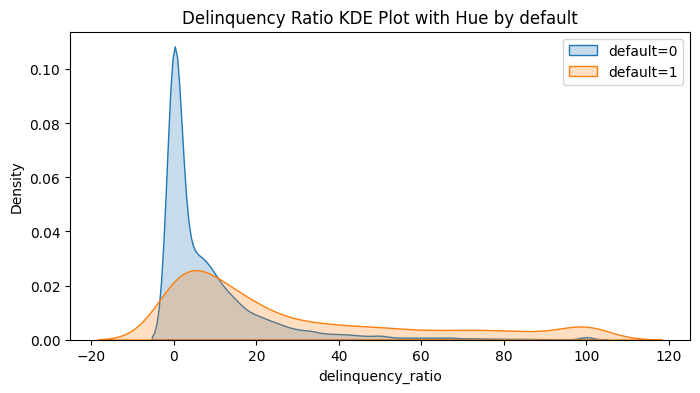

In [55]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['delinquency_ratio'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [56]:
df_train_1['avg_dpd_per_delinquency']=np.where(
    df_train_1['delinquent_months'] !=0,
    (df_train_1['total_dpd']/df_train_1['delinquent_months']).round(2),
    0)

df_test['avg_dpd_per_delinquency'] = np.where(
    df_test['delinquent_months'] != 0,
    (df_test['total_dpd'] / df_test['delinquent_months']).round(1),
    0
)


In [57]:
df_train_1['avg_dpd_per_delinquency'].describe()

count    37488.000000
mean         3.284160
std          2.906722
min          0.000000
25%          0.000000
50%          4.330000
75%          5.742500
max         10.000000
Name: avg_dpd_per_delinquency, dtype: float64

In [58]:
df_train_1['avg_dpd_per_delinquency'].isna().sum()

0

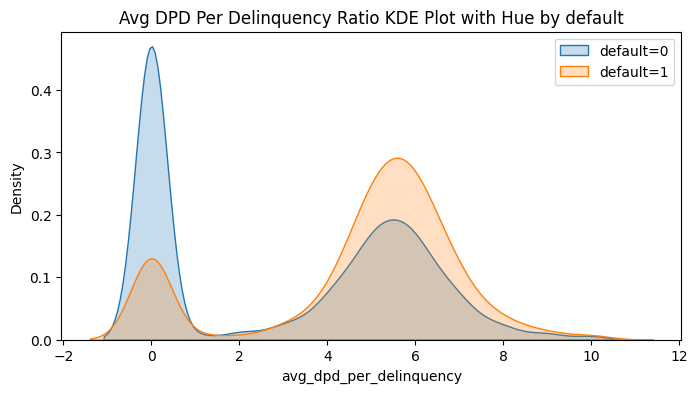

In [59]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 0], fill=True, label='default=0')
sns.kdeplot(df_train_1['avg_dpd_per_delinquency'][df_train_1['default'] == 1], fill=True, label='default=1')
plt.title(f"Avg DPD Per Delinquency Ratio KDE Plot with Hue by default")
plt.legend()
plt.show()

In [60]:
df_train_1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

### Feature Selection

In [61]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis='columns')
df_test=df_test.drop(['cust_id','loan_id'],axis='columns')

### Remove columns that business contact person asked us to remove

In [62]:
df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income', 
                              'total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_train_3.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [63]:
df_train_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37488 entries, 12746 to 37784
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37488 non-null  int64  
 1   gender                       37488 non-null  object 
 2   marital_status               37488 non-null  object 
 3   employment_status            37488 non-null  object 
 4   number_of_dependants         37488 non-null  int64  
 5   residence_type               37488 non-null  object 
 6   years_at_current_address     37488 non-null  int64  
 7   city                         37488 non-null  object 
 8   state                        37488 non-null  object 
 9   zipcode                      37488 non-null  int64  
 10  loan_purpose                 37488 non-null  object 
 11  loan_type                    37488 non-null  object 
 12  sanction_amount              37488 non-null  int64  
 13  processing_fee   

In [64]:
df_train_3.select_dtypes(['int64','float64']).columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [65]:
X_train=df_train_3.drop('default',axis='columns')
y_train=df_train_3['default']

### Performing VIF

for performing vif,the first step is to scale the columns

In [66]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale=df_train_3.select_dtypes(['int64','float64']).columns


scaler=MinMaxScaler()
X_train[cols_to_scale]=scaler.fit_transform(X_train[cols_to_scale])
X_train.head()


,age,gender,marital_status,employment_status,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode,...,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
12746,0.788462,M,Married,Self-Employed,0.6,Owned,0.966667,Hyderabad,Telangana,0.661017,...,0.415094,1.000000,0.613386,1.000000,1.0,0.375,0.363636,0.414520,0.1316,0.590
32495,0.500000,F,Single,Salaried,0.0,Owned,0.866667,Mumbai,Maharashtra,0.491525,...,0.830189,0.087020,0.025205,0.666667,0.5,0.500,0.050505,0.306792,0.0625,0.620
43675,0.384615,M,Single,Salaried,0.0,Mortgage,0.833333,Chennai,Tamil Nadu,0.830508,...,0.490566,0.326615,0.174318,0.000000,0.5,0.375,0.000000,0.758782,0.2222,0.558
9040,0.461538,M,Married,Salaried,0.4,Mortgage,0.966667,Bangalore,Karnataka,0.762712,...,0.641509,0.199051,0.077523,0.666667,0.0,0.875,0.878788,0.194379,0.0000,0.000
13077,0.769231,M,Married,Self-Employed,0.8,Owned,0.933333,Pune,Maharashtra,0.510169,...,0.169811,0.124156,0.072271,0.000000,1.0,0.000,0.717172,0.046838,0.0000,0.000


In [67]:
X_train.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000,37488.00000,37488.000000,37488.000000,37488.000000,37488.000000,37488.000000
mean,0.414240,0.388903,0.499918,0.523517,0.088840,0.082513,0.082513,0.082513,0.376631,0.261615,0.123550,0.500925,0.50056,0.501077,0.438653,0.294312,0.103300,0.328416
std,0.189590,0.307182,0.297364,0.286491,0.120117,0.112480,0.112480,0.112480,0.234860,0.244461,0.133275,0.373040,0.40701,0.253666,0.296902,0.228030,0.172983,0.290672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020555,0.018963,0.018963,0.018963,0.188679,0.077988,0.034205,0.000000,0.00000,0.375000,0.181818,0.110070,0.000000,0.000000
50%,0.403846,0.400000,0.500000,0.491525,0.049364,0.045516,0.045516,0.045516,0.339623,0.193870,0.082515,0.666667,0.50000,0.500000,0.393939,0.201405,0.036800,0.433000
75%,0.538462,0.600000,0.766667,0.762712,0.098027,0.095555,0.095555,0.095555,0.547170,0.352418,0.155192,1.000000,1.00000,0.625000,0.676768,0.505855,0.129500,0.574250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
X_test = df_test.drop('default', axis='columns')
y_test = df_test['default']

X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,0.415001,0.384892,0.502697,0.525015,0.089218,0.082800,0.082800,0.082800,0.375092,0.264632,0.124944,0.497293,0.500440,0.501470,0.436038,0.293038,0.106077,0.333844
std,0.188773,0.306871,0.298103,0.286179,0.120844,0.112877,0.112877,0.112877,0.233792,0.245290,0.134708,0.372576,0.407226,0.253618,0.295418,0.226176,0.173082,0.289680
min,0.000000,0.000000,0.000000,0.000000,-0.000019,-0.000126,-0.000126,-0.000126,0.000000,0.000163,0.000668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.288462,0.000000,0.233333,0.325424,0.020958,0.019387,0.019387,0.019387,0.188679,0.079715,0.034167,0.000000,0.000000,0.375000,0.181818,0.112412,0.000000,0.000000
50%,0.423077,0.400000,0.500000,0.510169,0.050189,0.046249,0.046249,0.046249,0.339623,0.198239,0.084024,0.333333,0.500000,0.500000,0.393939,0.201405,0.042100,0.440000
75%,0.538462,0.600000,0.766667,0.762712,0.097422,0.094927,0.094927,0.094927,0.547170,0.356914,0.157792,0.666667,1.000000,0.625000,0.676768,0.498829,0.133900,0.580000
max,1.000000,1.000000,1.000000,1.000000,0.981249,0.963717,0.963717,0.963717,1.000000,1.000000,0.939154,1.000000,1.000000,1.000000,1.000000,1.004684,1.000000,1.000000


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [70]:
calculate_vif(X_train[cols_to_scale])

c:\Users\msi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Column,VIF
0,age,5.700688
1,number_of_dependants,2.730311
2,years_at_current_address,3.422571
3,zipcode,3.797517
4,sanction_amount,101.086587
5,processing_fee,inf
6,gst,inf
7,net_disbursement,inf
8,loan_tenure_months,6.180526
9,principal_outstanding,16.326463


In [71]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']


X_train_1 = X_train.drop(features_to_drop_vif, axis='columns')
numeric_columns = X_train_1.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [72]:
vif_df=calculate_vif(X_train_1[numeric_columns])
vif_df

,Column,VIF
0,age,5.429192
1,number_of_dependants,2.726773
2,years_at_current_address,3.403705
3,zipcode,3.777877
4,loan_tenure_months,6.018731
5,bank_balance_at_application,1.804695
6,number_of_open_accounts,4.353476
7,number_of_closed_accounts,2.372444
8,enquiry_count,6.384090
9,credit_utilization_ratio,2.919834


In [73]:
selected_numeric_features_vif = vif_df.Column.values
selected_numeric_features_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype=object)

In [74]:
numeric_columns

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

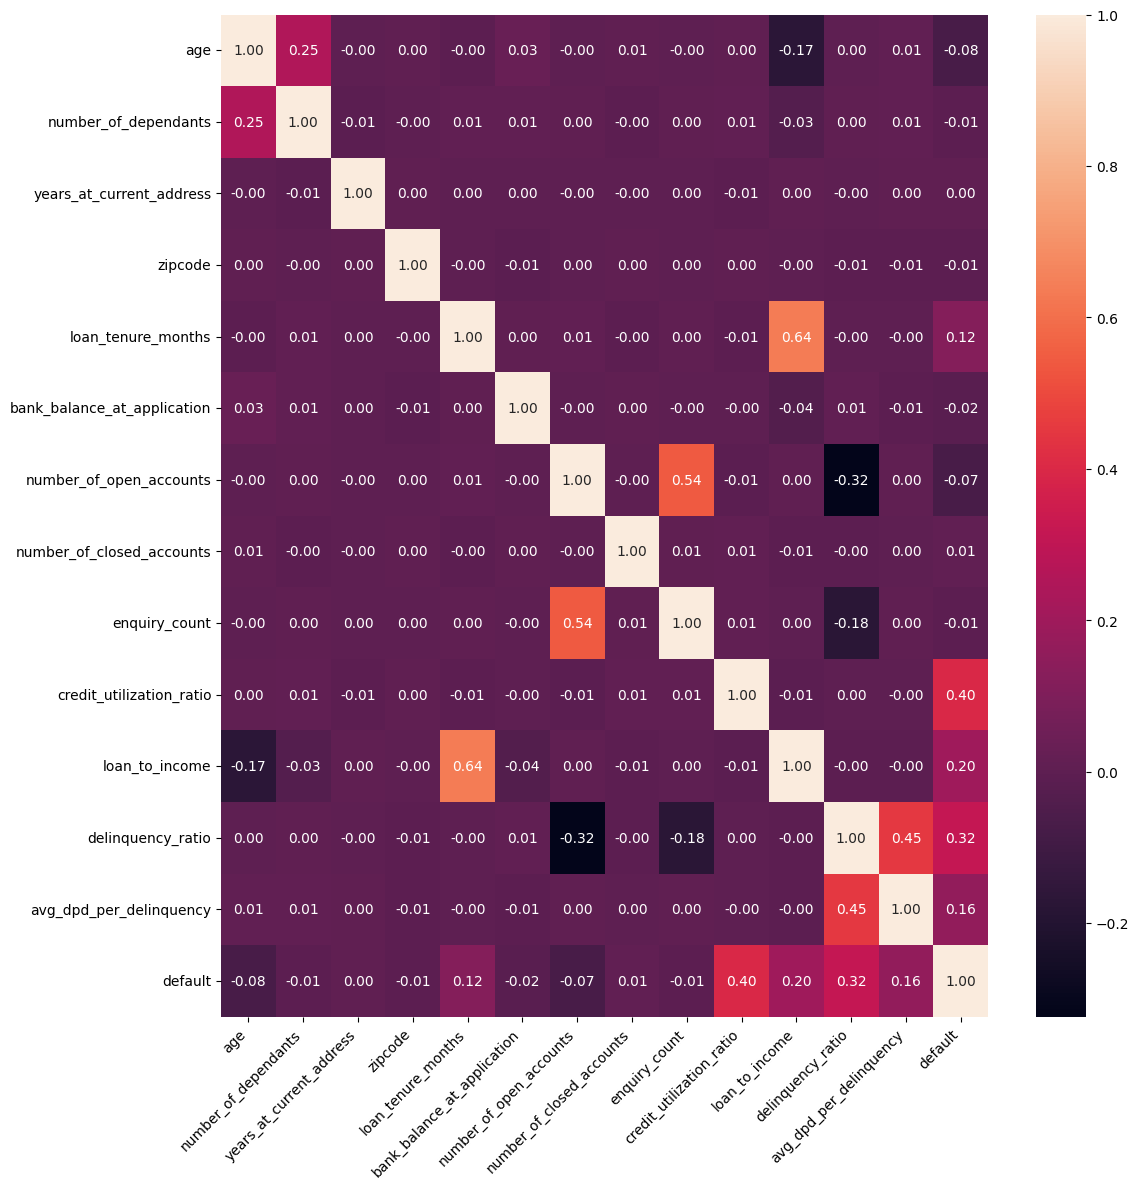

In [75]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True, fmt='0.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [76]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

### Feature selection for Categorical Variables

**Weight of evidence**

In [77]:
columns_categorical

['gender',
 'marital_status',
 'employment_status',
 'residence_type',
 'city',
 'state',
 'zipcode',
 'loan_purpose',
 'loan_type',
 'default']

In [78]:
temp=pd.concat([X_train_1,y_train],axis='columns')
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7447,327
Education,5620,559
Home,11304,1734
Personal,13117,603


In [79]:
def calculate_woe_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(['count','sum'])
    grouped=grouped.rename(columns={'count':'total','sum':'good'})
    grouped['bad']=grouped['total']-grouped['good']
    
    total_good=grouped['good'].sum()
    total_bad=grouped['bad'].sum()


    grouped['good_pct']=grouped['good']/total_good
    grouped['bad_pct']=grouped['bad']/total_bad
    grouped['woe']=np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv']=(grouped['good_pct']-grouped['bad_pct'])*grouped['woe']

    grouped['woe']=grouped['woe'].replace([np.inf,-np.inf],0)
    grouped['iv']=grouped['iv'].replace([np.inf,-np.inf],0)

    total_iv=grouped['iv'].sum()


    return grouped,total_iv


grouped,total_iv=calculate_woe_iv(pd.concat([X_train_1,y_train],axis='columns'),'loan_purpose','default')

In [80]:
grouped

,total,good,bad,good_pct,bad_pct,woe,iv
loan_purpose,,,,,,,
Auto,7447,327,7120,0.101458,0.207792,-0.716891,0.076230
Education,5620,559,5061,0.173441,0.147702,0.160642,0.004135
Home,11304,1734,9570,0.538008,0.279294,0.655609,0.169616
Personal,13117,603,12514,0.187093,0.365212,-0.668874,0.119140


In [81]:
total_iv

0.3691197842282755

In [82]:
iv_values = {}

for feature in X_train_1.columns:
    if X_train_1[feature].dtype == 'object':
        _, iv = calculate_woe_iv(pd.concat([X_train_1, y_train],axis=1), feature, 'default' )
    else:
        X_binned = pd.cut(X_train_1[feature], bins=10, labels=False)
        _, iv = calculate_woe_iv(pd.concat([X_binned, y_train],axis=1), feature, 'default' )
    iv_values[feature] = iv
        
iv_values

{'age': 0.0890689462679479,
 'gender': 0.00047449502170914947,
 'marital_status': 0.001129766845390142,
 'employment_status': 0.003953046301722585,
 'number_of_dependants': 0.0019380899135053508,
 'residence_type': 0.246745268718145,
 'years_at_current_address': 0.0020800513608156363,
 'city': 0.0019059578709781529,
 'state': 0.0019005589806779287,
 'zipcode': 0.0016677413243392572,
 'loan_purpose': 0.3691197842282755,
 'loan_type': 0.16319324904149224,
 'loan_tenure_months': 0.21893515090196278,
 'bank_balance_at_application': 0.0063187993277516365,
 'number_of_open_accounts': 0.08463134083005877,
 'number_of_closed_accounts': 0.0011964272592421567,
 'enquiry_count': 0.007864214085342608,
 'credit_utilization_ratio': 2.352965568168245,
 'loan_to_income': 0.476415456948364,
 'delinquency_ratio': 0.716576108689321,
 'avg_dpd_per_delinquency': 0.40176623566177694}

In [83]:
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

iv_df = pd.DataFrame(list(iv_values.items()), columns=['Feature', 'IV'])
iv_df = iv_df.sort_values(by='IV', ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,2.353
19,delinquency_ratio,0.717
18,loan_to_income,0.476
20,avg_dpd_per_delinquency,0.402
10,loan_purpose,0.369
5,residence_type,0.247
12,loan_tenure_months,0.219
11,loan_type,0.163
0,age,0.089
14,number_of_open_accounts,0.085


Feature selection using iv

In [84]:
# select features that has IV > 0.02
selected_features_iv = [feature for feature, iv in iv_values.items() if iv > 0.02]
selected_features_iv

['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquency_ratio',
 'avg_dpd_per_delinquency']

### Feature Encoding 

In [85]:
X_train_reduced=X_train_1[selected_features_iv]
X_test_reduced=X_test[selected_features_iv]

In [86]:
X_test_reduced.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency
19205,0.346,Owned,Home,Secured,0.755,0.333,0.990,0.550,0.000,0.000
15514,0.481,Owned,Education,Secured,0.226,1.000,0.323,0.220,0.000,0.000
30367,0.231,Owned,Auto,Secured,0.547,0.667,0.828,0.180,0.000,0.000
35347,0.365,Owned,Home,Secured,0.755,1.000,0.485,0.571,0.024,0.700
41814,0.577,Mortgage,Home,Secured,0.717,0.667,0.980,0.407,0.107,0.640


In [87]:
X_train_encoded=pd.get_dummies(X_train_reduced,drop_first=True)
X_test_encoded=pd.get_dummies(X_test_reduced,drop_first=True)
X_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquency_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
12746,0.788,0.415,1.000,0.364,0.415,0.132,0.590,True,False,False,True,False,False
32495,0.500,0.830,0.667,0.051,0.307,0.062,0.620,True,False,True,False,False,False
43675,0.385,0.491,0.000,0.000,0.759,0.222,0.558,False,False,False,True,False,False
9040,0.462,0.642,0.667,0.879,0.194,0.000,0.000,False,False,True,False,False,False
13077,0.769,0.170,0.000,0.717,0.047,0.000,0.000,True,False,False,False,True,True


In [88]:
y_train.value_counts()

default
0    34265
1     3223
Name: count, dtype: int64

<h3>Model Training</h3>

### Attempt 1

1.Logistic Regression

2.No handling of class imbalance

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model=LogisticRegression()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.85      0.72      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [90]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11423
           1       0.86      0.71      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.91      0.85      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [91]:
from xgboost import XGBClassifier

model=XGBClassifier()
model.fit(X_train_encoded,y_train)

y_pred=model.predict(X_test_encoded)

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.76      0.79      1074

    accuracy                           0.97     12497
   macro avg       0.90      0.87      0.89     12497
weighted avg       0.96      0.97      0.96     12497



### Randomized seachCV for attempt 1: Logistic Regression

In [92]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20),  # Logarithmically spaced values from 10^-4 to 10^4
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']   # Algorithm to use in the optimization problem
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=10000)  # Increased max_iter for convergence

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='f1',
    cv=3,  # 5-fold cross-validation
    verbose=2,
    random_state=42,  # Set a random state for reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'newton-cg', 'C': 545.5594781168514}
Best Score: 0.7578884658937152
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11423
           1       0.83      0.74      0.78      1074

    accuracy                           0.96     12497
   macro avg       0.90      0.86      0.88     12497
weighted avg       0.96      0.96      0.96     12497



### Randomized searchCV for attempt 1 : XGBoost

In [93]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  # L1 regularization term
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]  # L2 regularization term
}

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(X_train_encoded, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score: 0.7878581960738732
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11423
           1       0.77      0.84      0.80      1074

    accuracy                           0.96     12497
   macro avg       0.88      0.91      0.89     12497
weighted avg       0.97      0.96      0.97     12497



### Attempt 2 : Handling the classimbalance using undersampling

In [94]:
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3223
1    3223
Name: count, dtype: int64

In [95]:
#try the logistic Regression model
model=LogisticRegression()
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)

report=classification_report(y_test,y_pred)
print(report)


              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.95      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.93      0.81     12497
weighted avg       0.95      0.92      0.93     12497



In [96]:
model=XGBClassifier(**random_search.best_params_)
model.fit(X_train_rus,y_train_rus)

y_pred=model.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11423
           1       0.51      0.99      0.67      1074

    accuracy                           0.92     12497
   macro avg       0.75      0.95      0.81     12497
weighted avg       0.96      0.92      0.93     12497



### Attempt :3

oversampling,Handling the class imbalance using SMOTE Tomek

In [97]:
from imblearn.combine import SMOTETomek

smt=SMOTETomek(random_state=42)
X_train_smt,y_train_smt=smt.fit_resample(X_train_encoded,y_train)
y_train_smt.value_counts()

default
0    34199
1    34199
Name: count, dtype: int64

In [99]:
model=LogisticRegression()
model.fit(X_train_smt,y_train_smt)
y_pred=model.predict(X_test_encoded)

report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.94      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.77      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Model training from OPTUNA

In [101]:
import optuna
from sklearn.metrics import make_scorer,f1_score
from sklearn.model_selection import cross_val_score

In [102]:
#define the objective function of optuna
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  # Logarithmically spaced values
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']),  # Solvers
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  # Logarithmically spaced values for tolerance
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])  # Class weights
    }

    model = LogisticRegression(**param, max_iter=10000)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_logistic = optuna.create_study(direction='maximize')

study_logistic.optimize(objective, n_trials=50)

[I 2025-04-28 17:29:07,222] A new study created in memory with name: no-name-5034b7c1-4215-4e92-a165-5b59685a8bb2
[I 2025-04-28 17:29:10,317] Trial 0 finished with value: 0.772642844193211 and parameters: {'C': 0.00035482050593476137, 'solver': 'lbfgs', 'tol': 0.0959768767965229, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.772642844193211.
[I 2025-04-28 17:29:11,901] Trial 1 finished with value: 0.9456999253778617 and parameters: {'C': 117.68901807891625, 'solver': 'lbfgs', 'tol': 0.0004917677159347858, 'class_weight': None}. Best is trial 1 with value: 0.9456999253778617.
[I 2025-04-28 17:29:13,419] Trial 2 finished with value: 0.9459170708747958 and parameters: {'C': 1.5461494592971208, 'solver': 'lbfgs', 'tol': 0.0005855630375858105, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.9459170708747958.
[I 2025-04-28 17:29:14,729] Trial 3 finished with value: 0.8822761556858318 and parameters: {'C': 15.968000559692651, 'solver': 'lbfgs', 'tol': 0.041383758238829

In [103]:
print('Best trial:')
trial = study_logistic.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_logistic.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9459770113818994
  Params: 
    C: 706.8885453910733
    solver: saga
    tol: 0.0067880192595543105
    class_weight: balanced
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



### Attempt 4

1. XGBoost
1. Handle Class Imbalance Using SMOTE Tomek
1. Parameter tunning using optuna

In [104]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, X_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-04-28 18:01:04,482] A new study created in memory with name: no-name-4ed98f57-bf4a-4a7b-843e-a90b546e7d23
[I 2025-04-28 18:01:07,459] Trial 0 finished with value: 0.9656812036214064 and parameters: {'lambda': 0.06149930877125322, 'alpha': 0.023318797123012006, 'subsample': 0.7343011221002964, 'colsample_bytree': 0.787201229361981, 'max_depth': 6, 'eta': 0.17960029454553955, 'gamma': 0.18850165660223572, 'scale_pos_weight': 6.450589609510484, 'min_child_weight': 10, 'max_delta_step': 2}. Best is trial 0 with value: 0.9656812036214064.
[I 2025-04-28 18:01:09,650] Trial 1 finished with value: 0.9678994445805905 and parameters: {'lambda': 2.2676376089054178, 'alpha': 0.48707076971658836, 'subsample': 0.6552861805164014, 'colsample_bytree': 0.7872228562163001, 'max_depth': 7, 'eta': 0.14676886198309078, 'gamma': 7.207015932400847, 'scale_pos_weight': 1.0828214642982557, 'min_child_weight': 8, 'max_delta_step': 6}. Best is trial 1 with value: 0.9678994445805905.
[I 2025-04-28 18:01:1

In [105]:
print('Best trial:')
trial = study_xgb.best_trial
print('  F1-score: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))
    
best_params = study_xgb.best_params
best_model_xgb = XGBClassifier(**best_params)
best_model_xgb.fit(X_train_smt, y_train_smt)

# Evaluate on the test set
y_pred = best_model_xgb.predict(X_test_encoded)

report = classification_report(y_test, y_pred)
print(report)

Best trial:
  F1-score: 0.9766175315539529
  Params: 
    lambda: 0.06565108040356066
    alpha: 0.003368497986347786
    subsample: 0.8377947958019678
    colsample_bytree: 0.7341691968643538
    max_depth: 9
    eta: 0.23730865063221582
    gamma: 0.6045348269565398
    scale_pos_weight: 1.6037391864243538
    min_child_weight: 2
    max_delta_step: 2
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11423
           1       0.72      0.83      0.77      1074

    accuracy                           0.96     12497
   macro avg       0.85      0.90      0.88     12497
weighted avg       0.96      0.96      0.96     12497



In [106]:
y_pred=best_model_logistic.predict(X_test_encoded)
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11423
           1       0.56      0.95      0.70      1074

    accuracy                           0.93     12497
   macro avg       0.78      0.94      0.83     12497
weighted avg       0.96      0.93      0.94     12497



In [112]:
from sklearn.metrics import roc_curve

probabilitiese=best_model_logistic.predict_proba(X_test_encoded)[:,1]
probabilitiese

fpr,tpr,thresholds=roc_curve(y_test,probabilitiese)

fpr[:10],tpr[:10],thresholds[:10]

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.75426771e-05,
        8.75426771e-05, 1.75085354e-04, 1.75085354e-04, 2.62628031e-04,
        2.62628031e-04, 3.50170708e-04]),
 array([0.        , 0.0009311 , 0.15642458, 0.15642458, 0.17132216,
        0.17132216, 0.21880819, 0.21880819, 0.22811918, 0.22811918]),
 array([       inf, 1.        , 0.99959127, 0.99958973, 0.99947028,
        0.99946932, 0.99895978, 0.99894466, 0.99879445, 0.99877753]))

In [122]:
from sklearn.metrics import auc

area=auc(fpr,tpr)
area

0.9836291933472132

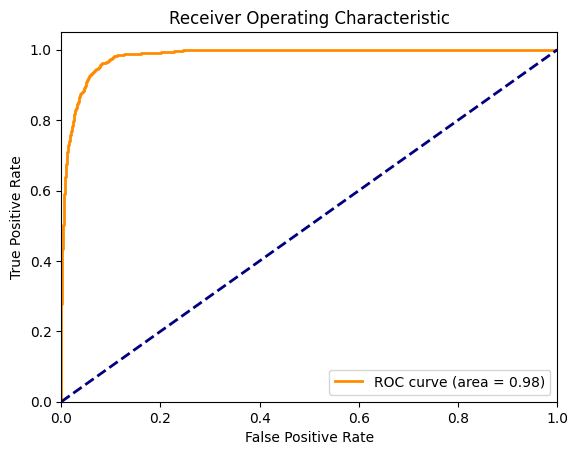

In [123]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()